<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Marco Roco Arias</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>

 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [40]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt


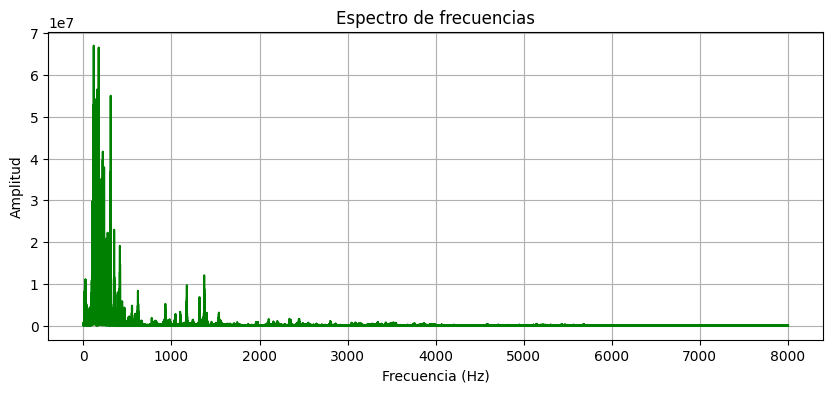

In [46]:

# Cargar el archivo de audio WAV
sample_rate, guitarra_data = wavfile.read('guitarraclasica.wav')

# Convertir guitarra_data a un array unidimensional si es necesario
if len(guitarra_data.shape) > 1:
    guitarra_data = guitarra_data[:, 0]  # Tomar solo el primer canal si hay varios


# Calcular la transformada de Fourier
fft_result = np.fft.fft(guitarra_data)
frequencies = np.fft.fftfreq(len(guitarra_data), d=1/sample_rate)

# Tomar solo las frecuencias positivas
positive_frequencies = frequencies[:len(guitarra_data) // 2]
positive_fft_output = np.abs(fft_result [:len(guitarra_data) // 2])

# Limitar el rango de frecuencias entre 0 y 8000 Hz
mask = (positive_frequencies >= 0) & (positive_frequencies <= 8000)
positive_frequencies = positive_frequencies[mask]
positive_fft_output = positive_fft_output[mask]

# Graficar el espectro de frecuencias
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_fft_output, color = "green")
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()



## 2. Obtén el espectrograma de tu señal de audio

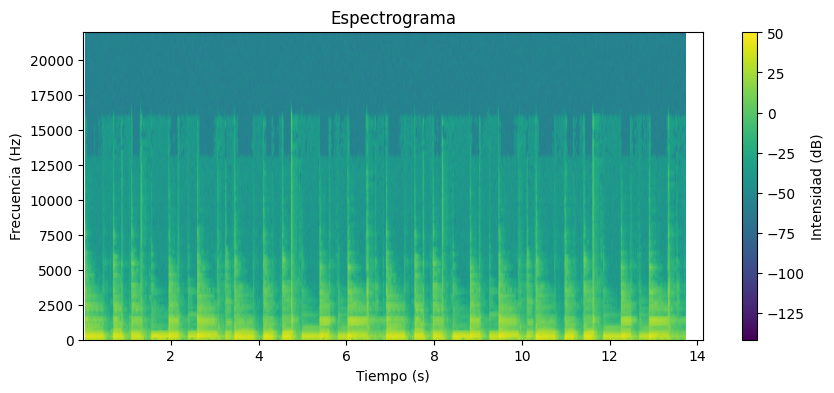

In [42]:

# Crear el espectrograma
plt.figure(figsize=(10, 4))
plt.specgram(guitarra_data, Fs=sample_rate)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma')
plt.colorbar(label='Intensidad (dB)')
plt.show()


## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

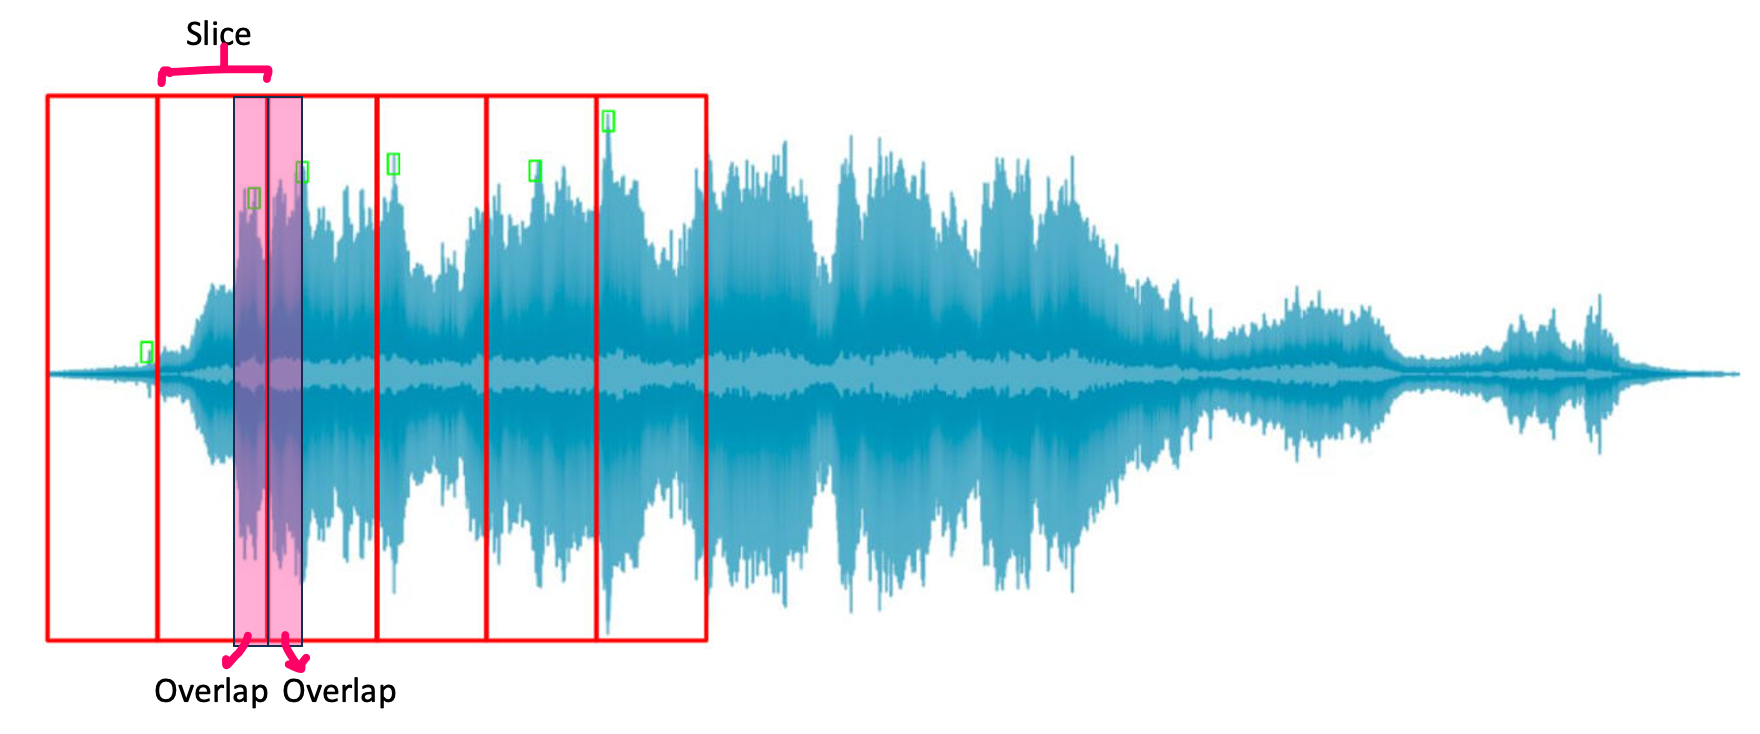

In [43]:

def slice_audio(guitarra_data, sample_rate, slice_length, overlap):
    # Calcular el número de muestras por slice
    slice_samples = int(slice_length * sample_rate)
    # Calcular el número de muestras de solapamiento
    overlap_samples = int(overlap * sample_rate)
    
    # Lista para almacenar los segmentos de audio
    slices = []
    
    # Índice inicial para el primer segmento
    start_index = 0
    
    # Iterar sobre los segmentos de audio
    while start_index < len(guitarra_data):
        # Calcular el índice final del segmento
        end_index = min(start_index + slice_samples, len(guitarra_data))
        # Agregar el segmento a la lista de slices
        slices.append(guitarra_data[start_index:end_index])
        # Mover el índice inicial al siguiente segmento con solapamiento
        start_index += slice_samples - overlap_samples
    
    return slices

# Parámetros del slicing
slice_length = 1.0  # Duración temporal de cada slice en segundos
overlap = 0.5  # Solapamiento en fracción de la longitud del slice

# Obtener los slices de audio
slices = slice_audio(guitarra_data, sample_rate, slice_length, overlap)

# Imprimir el número de slices
print(f"Número de slices: {len(slices)}")


Número de slices: 29


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


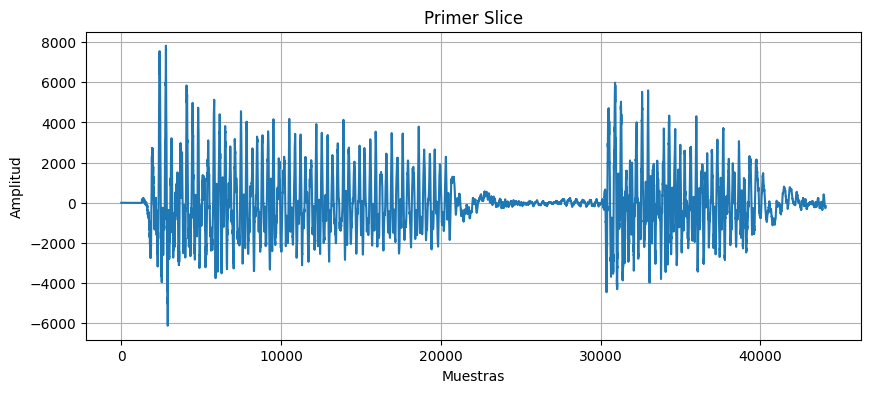

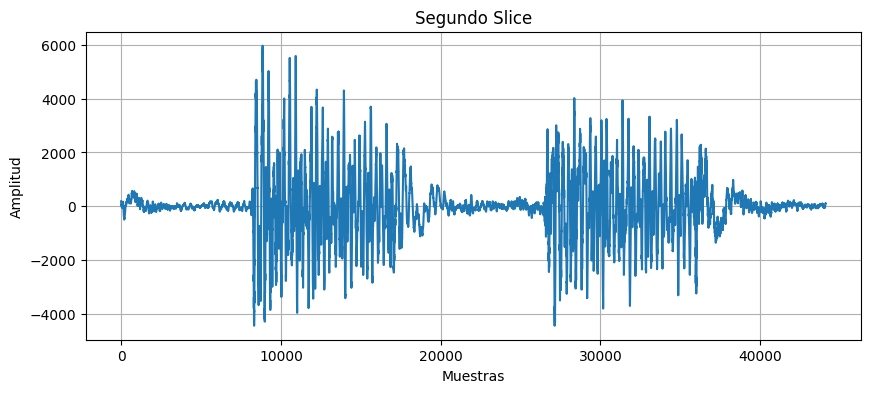

Primer slice:


In [44]:

import torch
from IPython.display import Audio


# Parámetros del slicing
slice_length = 1.0  # Duración temporal de cada slice en segundos
overlap = 0.5  # Solapamiento en fracción de la longitud del slice

# Calcular el número de muestras por slice y de solapamiento
slice_samples = int(slice_length * sample_rate)
overlap_samples = int(overlap * sample_rate)

# Lista para almacenar los segmentos de audio como tensores PyTorch
audio_slices = []

# Índice inicial para el primer segmento
start_index = 0

# Iterar sobre los segmentos de audio
while start_index < len(guitarra_data):
    # Calcular el índice final del segmento
    end_index = min(start_index + slice_samples, len(guitarra_data))
    # Obtener el segmento de audio
    slice_data = guitarra_data[start_index:end_index]
    # Convertir el segmento de audio a un tensor PyTorch y agregarlo a la lista
    audio_slices.append(torch.tensor(slice_data, dtype=torch.float32))
    # Mover el índice inicial al siguiente segmento con solapamiento
    start_index += slice_samples - overlap_samples

# Graficar de slices
plt.figure(figsize=(10, 4))
plt.plot(audio_slices[0].numpy())
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Primer Slice')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(audio_slices[1].numpy())
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Segundo Slice')
plt.grid(True)
plt.show()

# Reproducir el audio del primer slice
print("Primer slice:")
Audio(audio_slices[0].numpy(), rate=sample_rate)



## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

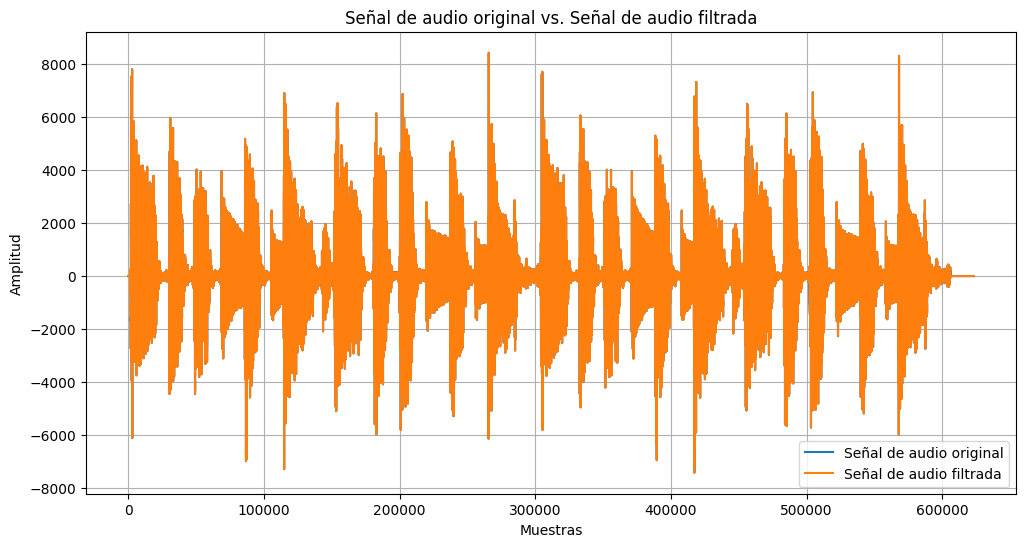

In [45]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter_lowpass_coefficients(normal_cutoff, order)
    return b, a

def butter_lowpass_coefficients(cutoff, order=5):
    nyquist = 0.5
    poles = np.exp(1j * np.pi * (0.5 + 2 * np.arange(order)) / order)
    poles = nyquist * (cutoff ** -1) * poles
    b = np.real(np.poly(poles))
    a = np.real(np.poly(poles))
    return b, a

# Parámetros del filtro Butterworth
order = 6  # Orden del filtro
cutoff_freq = 1000 # Frecuencia de corte en Hz

# Coeficientes del filtro Butterworth
b, a = butter_lowpass(cutoff_freq, sample_rate, order)

# Aplicar el filtro a la señal de audio
filtered_audio = np.zeros_like(guitarra_data)
for i in range(len(guitarra_data)):
    filtered_audio[i] = b[0] * guitarra_data[i]
    for j in range(1, order + 1):
        if i - j >= 0:
            filtered_audio[i] += b[j] * guitarra_data[i - j]
            filtered_audio[i] -= a[j] * filtered_audio[i - j]

# Graficar la señal de audio original y filtrada
plt.figure(figsize=(12, 6))
plt.plot(guitarra_data, label='Señal de audio original')
plt.plot(filtered_audio, label='Señal de audio filtrada')
plt.title("Señal de audio original vs. Señal de audio filtrada")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
